In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [ ]:
class Bandit:
    def __init__(self, bias):
        self.N = 0
        self.current_mean_reward = 0
        self.bias = bias
        
    def pull(self):
        return np.random.randn() + self.bias
    
    def update(self, reward):
        self.N += 1
        self.current_mean_reward = (1-1.0/self.N)*self.current_mean_reward + (1.0/self.N)*reward 

In [ ]:
def run_experiment(m1,m2,m3,eps,N):
    bandits = [Bandit(m1),Bandit(m2),Bandit(m3)]
    
    plot_data = np.empty(N)
    eps_data = np.empty(N)
    
    for i in range(N):
        
        e = np.random.random()
        
        if e < eps:
            j = np.random.choice(3)
        else:
            j = np.argmax([b.current_mean_reward for b in bandits])
        
        reward = bandits[j].pull()
        bandits[j].update(reward)
        
        plot_data[i] = reward
        
        eps = np.max(eps - 0.001,0)
        eps_data[i] = eps
        
        
    cumulative_avg = np.cumsum(plot_data)/(np.arange(N) + 1)
    
    plt.plot(cumulative_avg)
    plt.xscale('log')
    
        
            
            
    

In [ ]:
run_experiment(0,10,20,1.0,100000)

In [ ]:
def ucb(mean, n, nj):
    if nj == 0:
        return float('inf')
    return mean + np.sqrt(2*np.log(n) / nj)

def run_experiment_ucb(m1,m2,m3,N):
    bandits = [Bandit(m1),Bandit(m2),Bandit(m3)]
    
    plot_data = np.empty(N)
    
    for i in range(N):
        
        j = np.argmax([ucb(b.current_mean_reward,i,b.N)  for b in bandits])
        
        reward = bandits[j].pull()
        bandits[j].update(reward)
        
        plot_data[i] = reward
        
        
    cumulative_avg = np.cumsum(plot_data)/(np.arange(N) + 1)
    
    print(cumulative_avg)
    
    plt.plot(cumulative_avg)
    plt.xscale('log')
    
        
            
            
    

In [ ]:
run_experiment_ucb(0,10,20,100000)

In [30]:
class BayesianBandit:
    def __init__(self,m):
        self.sum_x = 0
        self.m = m
        self.m0 = 0
        self.l0 = 0.1 #vertilung mean estimator  N
        self.tau = 0.1  #data distribution  N
        #Find P(mean|X), don-t are about normalization constant
        # l = l0 + tau N
        # m l = m0 l0 + tau sum(xn)   m = m0l0 + tau sum(xn) / l0 + tau N
        # X ~ N(mu,t^-1) mu ~ N(m0,l0^-1)
        
    def pull(self):
        return np.random.randn() + self.m
    
    def sample(self):
        return np.random.randn() / np.sqrt(self.l0) + self.m0
    
    def update(self,x):
        self.l0 += self.tau
        
        self.sum_x = self.sum_x + x
        
        self.m0 = self.tau * self.sum_x/self.l0
        
        
    
        

In [31]:
def run_bayesian_experiment(m1,m2,m3,N):
    
    bandits = [BayesianBandit(m1), BayesianBandit(m2), BayesianBandit(m3)]
    reward_l = []
    
    for i in range(N):
        
        j = np.argmax([b.sample() for b in bandits])
        x = bandits[j].pull()
        bandits[j].update(x)
        
        reward_l.append(x)
        
        
    cumulative_average = np.cumsum(reward_l) / (np.arange(N) + 1)
    plt.plot(np.arange(0,N),cumulative_average)
        


<IPython.core.display.Javascript object>


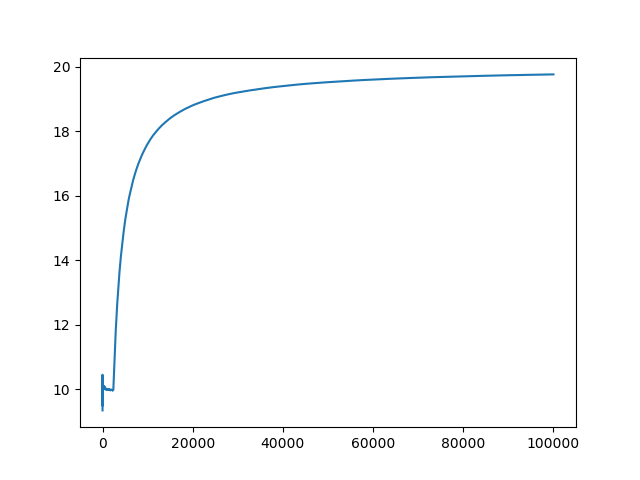

In [38]:
run_bayesian_experiment(0,10,20,100000)